In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('annual_global_CO2_levels', delimiter = "\t", names = ["Year", "CO2 Level"], skiprows = 1)

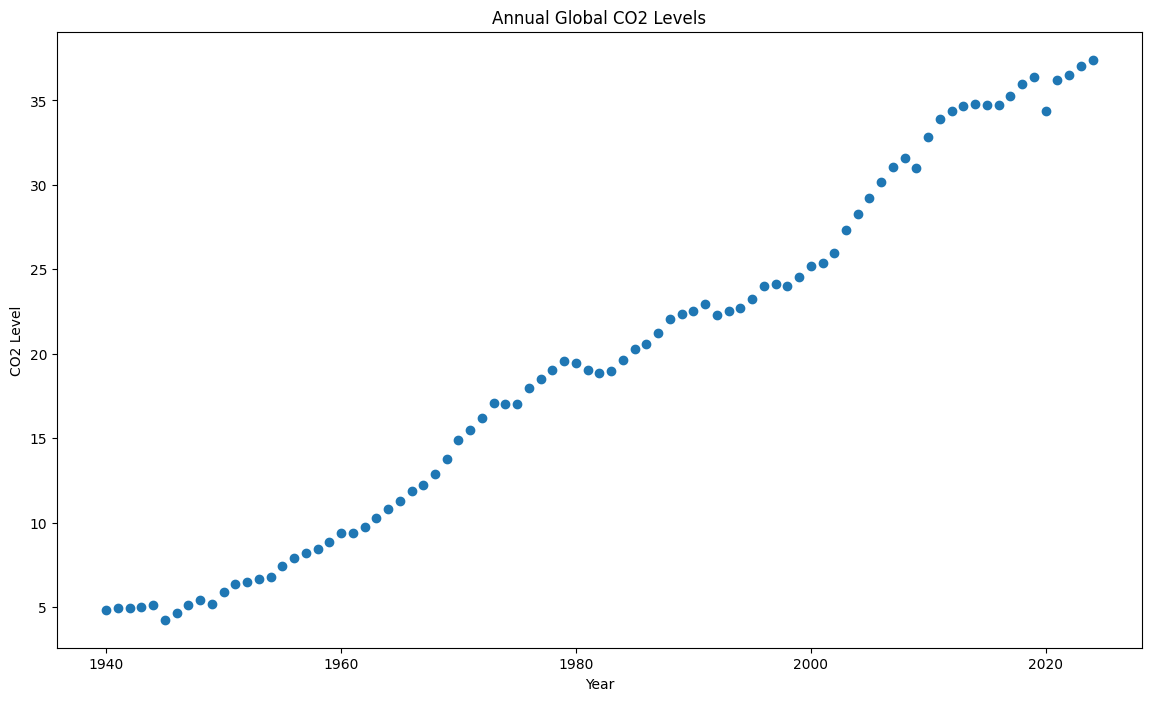

In [11]:
plt.figure(figsize = (14, 8))
plt.scatter(df['Year'], df['CO2 Level'])
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.show()

In [18]:
X = df['Year'].values.astype(np.float32)
X = (X - X.min()) / (X.max() - X.min())

y = df['CO2 Level'].values.astype(np.float32)
y = (y - y.min()) / (y.max() - y.min())

In [19]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 13)

In [20]:
print(len(X_train), len(X_val), len(X_test))

54 14 17


- model: $y_i = ax + b $
- metric: mean absolute error (MAE) $$E = \frac{1}{n} \sum_{i=1}^{n} |\hat{y}_i - y_i| $$
- Derivatives: $$ E_a = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(\hat{y}_i - y_i) \cdot x_i $$ $$ E_b = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(\hat{y}_i - y_i) $$

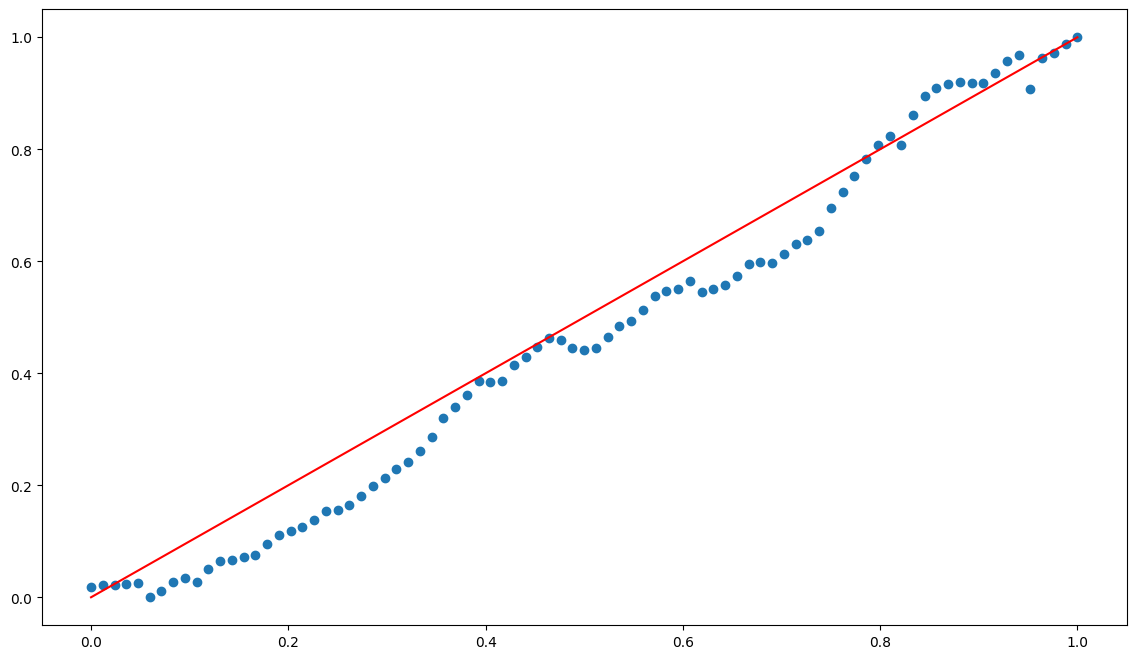

In [21]:
a = 1.0
b = 0.0

x = np.linspace(0, 1, 100)
y_model = a * x - b

plt.figure(figsize = (14, 8))
plt.scatter(X, y)
plt.plot(x, y_model, color = 'red')
plt.show()

$$ E = \frac{1}{n} \sum_{i=1}^{n} |(ax_i + b) - y_i| $$

In [39]:
a = 1.0
b = 0.0

# hyperparameters
learning_rate = 1E-3
epochs = 1000

training_loss = []
validation_loss = []

# Training loop
for epoch in range(epochs):
    y_pred_train = a * X_train + b

    da = np.mean(np.sign(y_pred_train - y_train) * X_train)
    db = np.mean(np.sign(y_pred_train - y_train))

    a = a - learning_rate * da
    b = b - learning_rate * db

    y_pred_train = a * X_train + b
    loss = np.mean(np.abs(y_pred_train - y_train))
    training_loss.append(loss)

    y_pred_val = a * X_val + b
    val_loss = np.mean(np.abs(y_pred_val - y_val))
    validation_loss.append(val_loss)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss}')

Epoch 0: loss = 0.04978134110569954
Epoch 100: loss = 0.03656311333179474
Epoch 200: loss = 0.03437954932451248
Epoch 300: loss = 0.03278498724102974
Epoch 400: loss = 0.031533028930425644
Epoch 500: loss = 0.030946360900998116
Epoch 600: loss = 0.030433425679802895
Epoch 700: loss = 0.029996206983923912
Epoch 800: loss = 0.02955915778875351
Epoch 900: loss = 0.02917579747736454


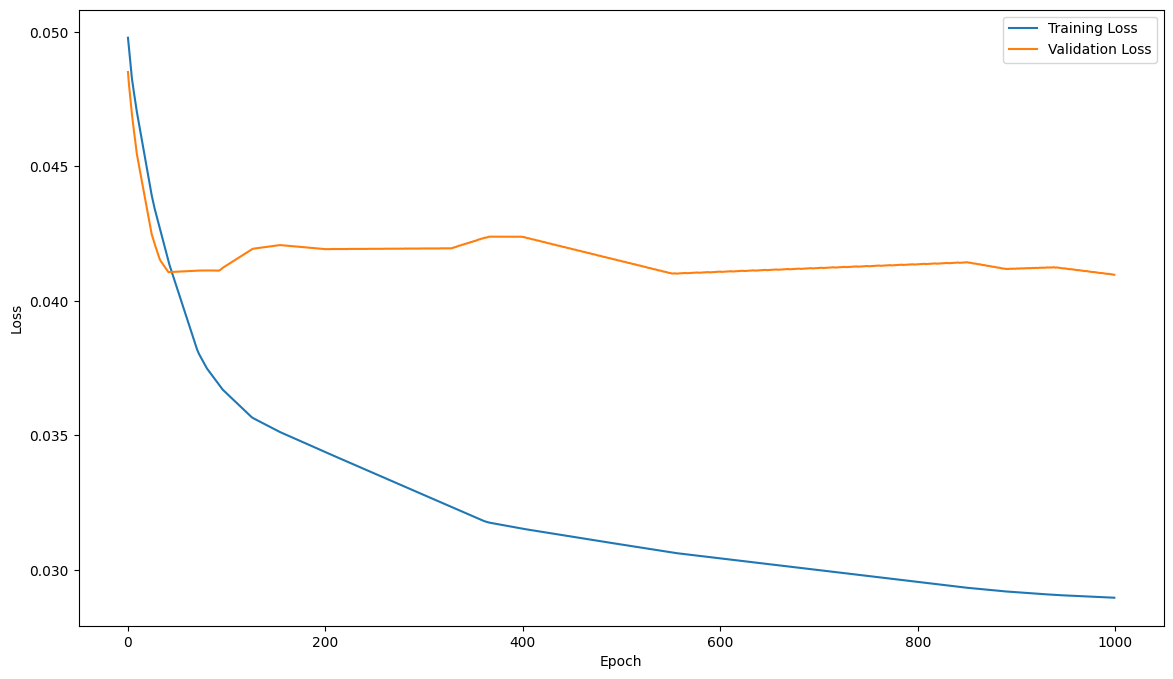

In [40]:
plt.figure(figsize = (14, 8))
plt.plot(training_loss, label = 'Training Loss')
plt.plot(validation_loss, label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
